In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from photoz_utils import *
from photoz_plots import *

In [2]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  # Restrict TensorFlow to only allocate 10GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [19]:
nn_small = pd.read_csv('/predictions/HSC_v6_NN_neurips_small_v3/testing_metrics.csv')
nn_full = pd.read_csv('/predictions/HSC_v6_NN_neurips_test_v3/testing_metrics.csv')
combined_cnn_small = pd.read_csv('/predictions/HSC_v6_NN_neurips_combined_with_5pool_v3/testing_metrics.csv')
combined_cnn_full = pd.read_csv('/predictions/HSC_v6_NN_neurips_combined_with_5pool_v6/testing_metrics.csv')
old_cnn = pd.read_csv('/predictions/HSC_v6_CNNTrials_5_pooling_2x2_filters_doubled_v3/testing_metrics_big.csv')
cnn_nodrop = pd.read_csv('/predictions/HSC_v6_NN_neurips_combined_with_5pool_v6/testing_metrics.csv')

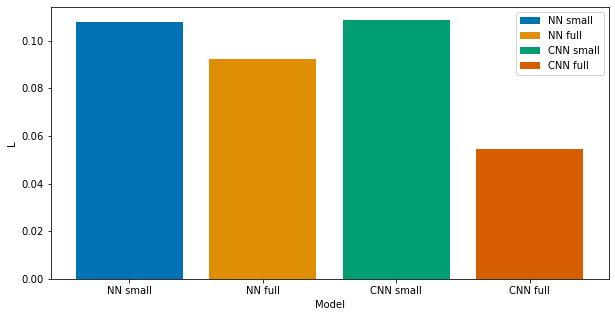

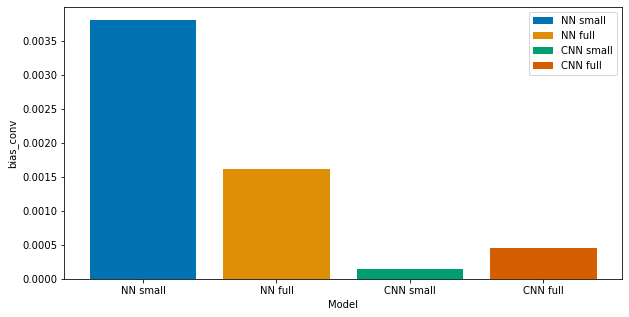

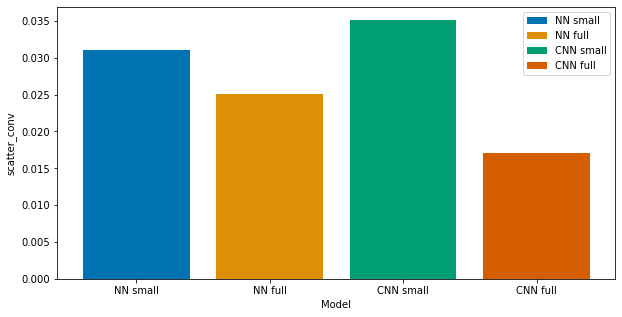

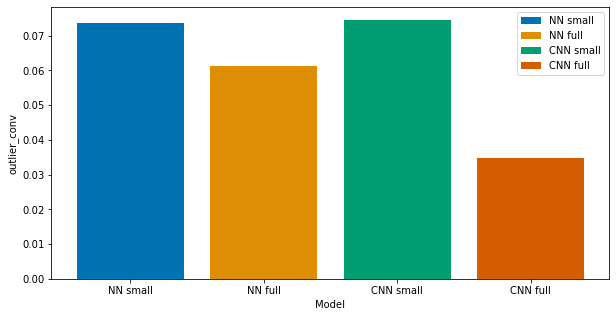

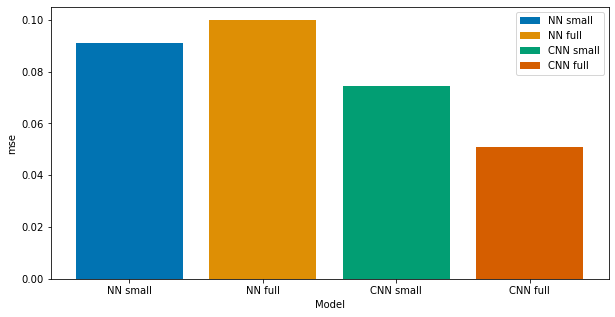

In [4]:
compare_point_metrics_bar([nn_small, nn_full, combined_cnn_small, combined_cnn_full], ['NN small', 'NN full', 'CNN small', 'CNN full'])

In [5]:
nn_small_pred = pd.read_csv('/predictions/HSC_v6_NN_neurips_small_v2/testing_predictions.csv')
nn_full_pred = pd.read_csv('/predictions/HSC_v6_NN_neurips_test_v2/testing_predictions.csv')
cnn_small_pred = pd.read_csv('/predictions/HSC_v6_NN_neurips_combined_with_5pool_v2/testing_predictions.csv')
cnn_full_pred = pd.read_csv('/predictions/HSC_v6_NN_neurips_combined_with_5pool_v6/testing_predictions.csv')
old_cnn_pred = pd.read_csv('/predictions/HSC_v6_CNNTrials_5_pooling_2x2_filters_doubled_v3/testing_predictions_big.csv')
cnn_nodrop = pd.read_csv('/predictions/HSC_v6_NN_neurips_combined_with_5pool_v7/testing_predictions.csv')

In [6]:
with h5py.File('/data/HSC/HSC_v6/step2A/127x127/five_band_image127x127_with_metadata_corrected_testing.hdf5', 'r') as file:
    y_test = pd.Series(file['specz_redshift'][:])

In [7]:
nn_full_binned = get_point_metrics(nn_full_pred['photoz'], y_test, binned=True)
cnn_full_binned = get_point_metrics(cnn_full_pred['photoz'], y_test, binned=True)
old_cnn_binned = get_point_metrics(old_cnn_pred['photoz'], y_test, binned=True)
cnn_nodrop_binned = get_point_metrics(cnn_nodrop['photoz'], y_test, binned=True)

In [8]:
cnn_full_binned

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv,mse
0,"(0.0, 0.2]",10052,0.019463,-0.002444,-0.002180,0.014691,0.013101,0.088440,0.006665,0.004688
1,"(0.2, 0.4]",7859,0.038739,-0.003320,-0.002694,0.017368,0.014476,0.129788,0.022267,0.011222
2,"(0.4, 0.6]",10240,0.028826,0.002382,0.002346,0.016503,0.014052,0.110645,0.011914,0.010294
3,"(0.6, 0.8]",6818,0.040699,0.002743,0.003114,0.020546,0.018100,0.100176,0.021414,0.022620
4,"(0.8, 1.0]",2798,0.076545,-0.000180,0.000639,0.028426,0.026044,0.124017,0.047177,0.075107
5,"(1.0, 1.2]",1095,0.133600,0.002353,0.003890,0.046335,0.042902,0.125114,0.085845,0.150551
6,"(1.2, 1.4]",766,0.164138,-0.014084,-0.014359,0.057063,0.050704,0.140992,0.105744,0.124741
7,"(1.4, 1.6]",482,0.238589,-0.004269,-0.008209,0.091375,0.068490,0.178423,0.209544,0.168394
8,"(1.6, 1.8]",401,0.219731,0.011594,0.003938,0.090521,0.068457,0.132170,0.162095,0.125225
9,"(1.8, 2.0]",346,0.216902,-0.029643,-0.031281,0.078983,0.059806,0.158960,0.179191,0.141104


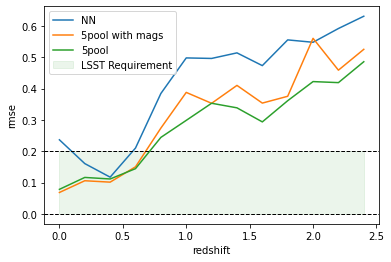

In [9]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(nn_full_binned['mse'][0:13]), label='NN')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(cnn_full_binned['mse'][0:13]), label='5pool with mags')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(old_cnn_binned['mse'][0:13]), label='5pool')
plt.axhline(y=0.2, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.fill_between(np.arange(0,2.6,0.2), 0.2, 0, alpha = 0.08, color = 'green', label='LSST Requirement')
plt.ylabel('rmse')
plt.xlabel('redshift')
plt.legend()

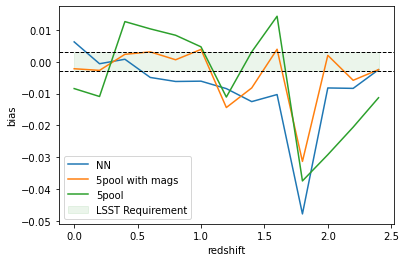

In [10]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=nn_full_binned['bias_conv'][0:13], label='NN')
sns.lineplot(x=np.arange(0,2.6,0.2), y=cnn_full_binned['bias_conv'][0:13], label='5pool with mags')
sns.lineplot(x=np.arange(0,2.6,0.2), y=old_cnn_binned['bias_conv'][0:13], label='5pool')
plt.axhline(y=0.003, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-0.003, color='black', linestyle='--', linewidth=1)
plt.fill_between(np.arange(0,2.6,0.2), 0.003,-0.003, alpha = 0.08, color = 'green', label='LSST Requirement')
plt.ylabel('bias')
plt.xlabel('redshift')
plt.legend()

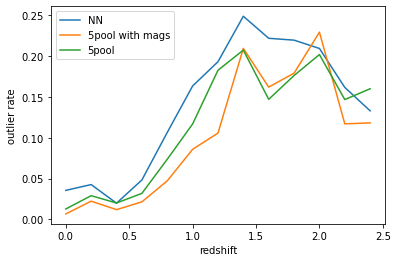

In [11]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=nn_full_binned['outlier_conv'][0:13], label='NN')
sns.lineplot(x=np.arange(0,2.6,0.2), y=cnn_full_binned['outlier_conv'][0:13], label='5pool with mags')
sns.lineplot(x=np.arange(0,2.6,0.2), y=old_cnn_binned['outlier_conv'][0:13], label='5pool')
plt.ylabel('outlier rate')
plt.xlabel('redshift')
plt.legend()

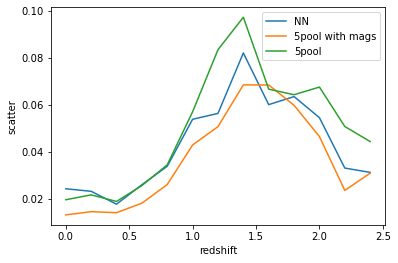

In [12]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=nn_full_binned['scatter_conv'][0:13], label='NN')
sns.lineplot(x=np.arange(0,2.6,0.2), y=cnn_full_binned['scatter_conv'][0:13], label='5pool with mags')
sns.lineplot(x=np.arange(0,2.6,0.2), y=old_cnn_binned['scatter_conv'][0:13], label='5pool')
plt.ylabel('scatter')
plt.xlabel('redshift')
plt.legend()

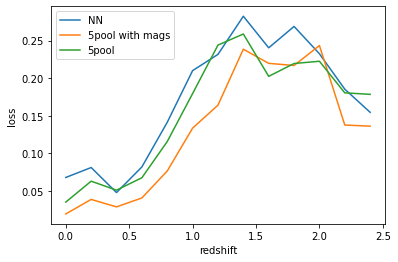

In [13]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=nn_full_binned['L'][0:13], label='NN')
sns.lineplot(x=np.arange(0,2.6,0.2), y=cnn_full_binned['L'][0:13], label='5pool with mags')
sns.lineplot(x=np.arange(0,2.6,0.2), y=old_cnn_binned['L'][0:13], label='5pool')
plt.ylabel('loss')
plt.xlabel('redshift')
plt.legend()

In [14]:
combined_cnn_full

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv,mse
0,"(0.0, 4.0]",42960,0.054355,-0.000505,-0.000447,0.020007,0.0171,0.135335,0.034707,0.050786


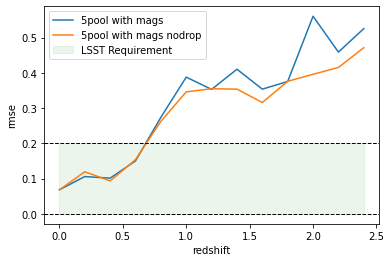

In [15]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(cnn_full_binned['mse'][0:13]), label='5pool with mags')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(cnn_nodrop_binned['mse'][0:13]), label='5pool with mags nodrop')
plt.axhline(y=0.2, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.fill_between(np.arange(0,2.6,0.2), 0.2, 0, alpha = 0.08, color = 'green', label='LSST Requirement')
plt.ylabel('rmse')
plt.xlabel('redshift')
plt.legend()

/opt/anaconda3/envs/jupyterhub/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/jupyterhub/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


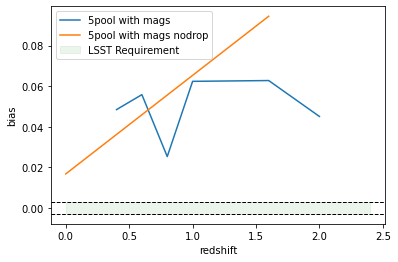

In [16]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(cnn_full_binned['bias_conv'][0:13]), label='5pool with mags')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(cnn_nodrop_binned['bias_conv'][0:13]), label='5pool with mags nodrop')
plt.axhline(y=0.003, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-0.003, color='black', linestyle='--', linewidth=1)
plt.fill_between(np.arange(0,2.6,0.2), 0.003,-0.003, alpha = 0.08, color = 'green', label='LSST Requirement')
plt.ylabel('bias')
plt.xlabel('redshift')
plt.legend()

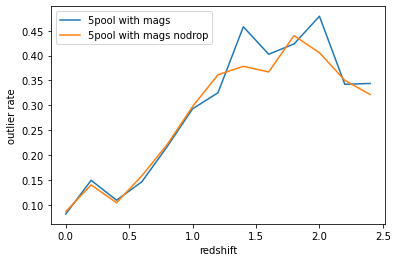

In [17]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(cnn_full_binned['outlier_conv'][0:13]), label='5pool with mags')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(cnn_nodrop_binned['outlier_conv'][0:13]), label='5pool with mags nodrop')
plt.ylabel('outlier rate')
plt.xlabel('redshift')
plt.legend()

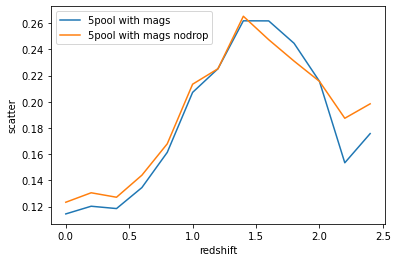

In [18]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(cnn_full_binned['scatter_conv'][0:13]), label='5pool with mags')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(cnn_nodrop_binned['scatter_conv'][0:13]), label='5pool with mags nodrop')
plt.ylabel('scatter')
plt.xlabel('redshift')
plt.legend()

In [21]:
combined_cnn_full

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv,mse
0,"(0.0, 4.0]",42960,0.054355,-0.000505,-0.000447,0.020007,0.0171,0.135335,0.034707,0.050786


In [22]:
cnn_nodrop

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv,mse
0,"(0.0, 4.0]",42960,0.054355,-0.000505,-0.000447,0.020007,0.0171,0.135335,0.034707,0.050786
